In [11]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo



In [72]:
AQI = pd.read_excel(r'D:\project\Air quality index.xlsx')
AQI.info()

AQI =AQI.drop(columns=["City","Date","AQI Bucket"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         2192 non-null   object        
 1   Date         2192 non-null   datetime64[ns]
 2   PM2.5        2192 non-null   float64       
 3   PM10         2192 non-null   float64       
 4   NO           2192 non-null   float64       
 5   NO2          2192 non-null   float64       
 6   Nox          2192 non-null   float64       
 7   NH3          2192 non-null   float64       
 8   SO2          2192 non-null   float64       
 9   CO           2192 non-null   float64       
 10  Ozone        2192 non-null   float64       
 11  Benzene      2192 non-null   float64       
 12  Toluene      2192 non-null   float64       
 13  Eth-Benzene  2192 non-null   float64       
 14  AQI          2192 non-null   float64       
 15  AQI Bucket   2192 non-null   object        
dtypes: dat

In [73]:
AQI

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,AQI
0,95.81,207.39,23.39,31.76,35.90,14.38,31.51,1.23,41.29,0.59,3.82,0.15,207.39
1,106.89,255.81,22.39,39.09,38.99,16.43,25.55,1.22,42.54,0.67,7.88,0.10,255.81
2,90.75,196.91,26.64,34.01,38.67,17.06,25.89,1.04,50.06,0.53,7.52,0.11,196.91
3,87.34,202.62,28.37,32.43,40.31,16.73,26.29,0.98,44.37,0.48,5.98,0.37,202.62
4,111.32,262.55,27.52,44.69,46.15,20.96,32.39,1.28,39.58,0.61,5.78,0.46,262.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,87.55,172.30,3.19,43.71,25.84,26.59,14.37,1.09,85.12,0.00,0.00,0.00,172.30
2188,146.29,200.45,3.73,36.46,22.43,35.15,25.89,1.10,73.00,0.00,0.00,0.00,200.45
2189,117.66,161.16,4.11,37.36,23.22,26.58,20.63,1.00,60.43,0.00,0.00,0.00,161.16
2190,72.71,109.88,2.82,27.26,16.79,18.35,12.83,0.79,54.44,0.00,0.00,0.00,109.88


In [75]:
AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        2192 non-null   float64
 1   PM10         2192 non-null   float64
 2   NO           2192 non-null   float64
 3   NO2          2192 non-null   float64
 4   Nox          2192 non-null   float64
 5   NH3          2192 non-null   float64
 6   SO2          2192 non-null   float64
 7   CO           2192 non-null   float64
 8   Ozone        2192 non-null   float64
 9   Benzene      2192 non-null   float64
 10  Toluene      2192 non-null   float64
 11  Eth-Benzene  2192 non-null   float64
 12  AQI          2192 non-null   float64
dtypes: float64(13)
memory usage: 222.8 KB


In [77]:
chi_square_value,p_value=calculate_bartlett_sphericity(AQI)
print(chi_square_value, p_value)

20920.515799007513 0.0


In [78]:
Fa= FactorAnalyzer(10,rotation=None)
Fa.fit(AQI)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)


FactorAnalyzer(rotation=None, rotation_kwargs={})

In [45]:
ev, v = Fa.get_eigenvalues()
ev

array([5.09338386, 2.44896384, 1.0157341 , 0.8951959 , 0.79872014,
       0.71127387, 0.59635237, 0.54431889, 0.41024285, 0.22437605,
       0.12407272, 0.11088525, 0.02648014])

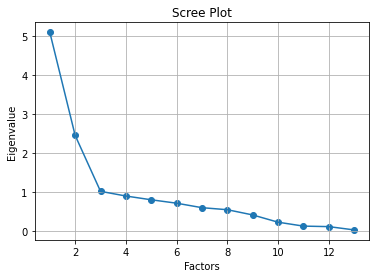

In [46]:
plt.scatter(range(1,AQI.shape[1]+1),ev)
plt.plot(range(1,AQI.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [47]:
#here we can see that we have only 3 factors value greater than 1 so we choose 3 factors


In [49]:
a = FactorAnalyzer(3, rotation="varimax", method='minres', use_smc=True)
fa.fit(AQI)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

fa.loadings_

array([[-0.21883017,  0.48562162,  0.23931923],
       [ 0.12877785, -0.01894186,  0.93075302],
       [ 0.09715341,  0.6894333 , -0.12183096],
       [ 0.04469816,  0.83791088, -0.00539864],
       [ 0.21865276,  0.83424182, -0.01888223],
       [ 0.06676335,  0.3182928 ,  0.08360593],
       [ 0.21409501,  0.09640851,  0.26693129],
       [-0.19115716,  0.58727111,  0.02505325],
       [-0.35662989, -0.02200206,  0.33708849],
       [ 0.81488018,  0.02354798,  0.2127465 ],
       [ 0.92094507, -0.09080356,  0.07885437],
       [ 0.87308853,  0.04141302, -0.01866607],
       [ 0.02002259,  0.07618598,  0.94958735]])

In [51]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', ], index=AQI.columns)
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
             Factor 1  Factor 2  Factor 3
PM2.5       -0.218830  0.485622  0.239319
PM10         0.128778 -0.018942  0.930753
NO           0.097153  0.689433 -0.121831
NO2          0.044698  0.837911 -0.005399
Nox          0.218653  0.834242 -0.018882
NH3          0.066763  0.318293  0.083606
SO2          0.214095  0.096409  0.266931
CO          -0.191157  0.587271  0.025053
Ozone       -0.356630 -0.022002  0.337088
Benzene      0.814880  0.023548  0.212746
Toluene      0.920945 -0.090804  0.078854
Eth-Benzene  0.873089  0.041413 -0.018666
AQI          0.020023  0.076186  0.949587


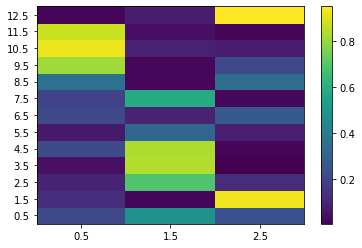

In [54]:
Z=np.abs(loadings)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)

plt.show()

In [61]:
print(pd.DataFrame(fa.loadings_,index=AQI.columns))

                    0         1         2
PM2.5       -0.218830  0.485622  0.239319
PM10         0.128778 -0.018942  0.930753
NO           0.097153  0.689433 -0.121831
NO2          0.044698  0.837911 -0.005399
Nox          0.218653  0.834242 -0.018882
NH3          0.066763  0.318293  0.083606
SO2          0.214095  0.096409  0.266931
CO          -0.191157  0.587271  0.025053
Ozone       -0.356630 -0.022002  0.337088
Benzene      0.814880  0.023548  0.212746
Toluene      0.920945 -0.090804  0.078854
Eth-Benzene  0.873089  0.041413 -0.018666
AQI          0.020023  0.076186  0.949587


In [ ]:
predictions.to_excel('D:\project\Air quality index resultp.xlsx')

In [62]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          2.612590  2.581855  2.084846
Proportional Var  0.200968  0.198604  0.160373
Cumulative Var    0.200968  0.399573  0.559945
